In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [3]:
breast = load_breast_cancer()

In [4]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [5]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
breast_labels = breast.target

In [7]:
labels = np.reshape(breast_labels,(569,1))

In [8]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [9]:
breast_dataset = pd.DataFrame(final_breast_data)

In [10]:
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
features_labels = np.append(features, 'label')

In [12]:
breast_dataset.columns = features_labels

In [13]:
breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

In [14]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [16]:
sc_X = StandardScaler()
breast_input = sc_X.fit_transform(breast_input)

In [30]:
breast_input_copy = breast_input
acc = [None]*9
precision = [None]*9
recall = [None]*9
for i in range(9):
    j=i+1;
    pca = PCA(n_components=j)
    breast_input_copy = breast_input
    breast_input_copy = pca.fit_transform(breast_input_copy)
    X_train, X_test, Y_train, Y_test = train_test_split(breast_input_copy, breast_labels, train_size=0.8, test_size=0.2, random_state=0)
    dataset = datasets.load_iris()
    model = GaussianNB()
    model.fit(X_train, Y_train)
    print("K:", j)
    print(model)
    expected = Y_train
    predicted = model.predict(X_train)
    acc[i] = metrics.accuracy_score(expected, predicted)
    precision[i] = metrics.precision_score(expected, predicted)
    recall[i] = metrics.recall_score(expected, predicted)
    print("Accuracy:", metrics.accuracy_score(expected, predicted))
    print("Precision:", metrics.precision_score(expected, predicted))
    print("Recall:", metrics.recall_score(expected, predicted))
    print("")

K: 1
GaussianNB()
Accuracy: 0.9142857142857143
Precision: 0.9114754098360656
Recall: 0.9586206896551724

K: 2
GaussianNB()
Accuracy: 0.9164835164835164
Precision: 0.9144736842105263
Recall: 0.9586206896551724

K: 3
GaussianNB()
Accuracy: 0.9230769230769231
Precision: 0.9235880398671097
Recall: 0.9586206896551724

K: 4
GaussianNB()
Accuracy: 0.9230769230769231
Precision: 0.9264214046822743
Recall: 0.9551724137931035

K: 5
GaussianNB()
Accuracy: 0.9252747252747253
Precision: 0.9210526315789473
Recall: 0.9655172413793104

K: 6
GaussianNB()
Accuracy: 0.9340659340659341
Precision: 0.9333333333333333
Recall: 0.9655172413793104

K: 7
GaussianNB()
Accuracy: 0.9274725274725275
Precision: 0.9297658862876255
Recall: 0.9586206896551724

K: 8
GaussianNB()
Accuracy: 0.9274725274725275
Precision: 0.9297658862876255
Recall: 0.9586206896551724

K: 9
GaussianNB()
Accuracy: 0.9186813186813186
Precision: 0.9174917491749175
Recall: 0.9586206896551724



In [27]:
print("accuracy:")
acc

accuracy:


[0.9142857142857143,
 0.9164835164835164,
 0.9230769230769231,
 0.9230769230769231,
 0.9252747252747253,
 0.9340659340659341,
 0.9274725274725275,
 0.9274725274725275,
 0.9186813186813186]

In [28]:
print("Precision:")
precision

Precision:


[0.9114754098360656,
 0.9144736842105263,
 0.9235880398671097,
 0.9264214046822743,
 0.9210526315789473,
 0.9333333333333333,
 0.9297658862876255,
 0.9297658862876255,
 0.9174917491749175]

In [29]:
print("Recall:")
recall

Recall:


[0.9586206896551724,
 0.9586206896551724,
 0.9586206896551724,
 0.9551724137931035,
 0.9655172413793104,
 0.9655172413793104,
 0.9586206896551724,
 0.9586206896551724,
 0.9586206896551724]

In [31]:
K = [None]*9
for i in range(9):
    K[i] = i+1

In [32]:
K

[1, 2, 3, 4, 5, 6, 7, 8, 9]

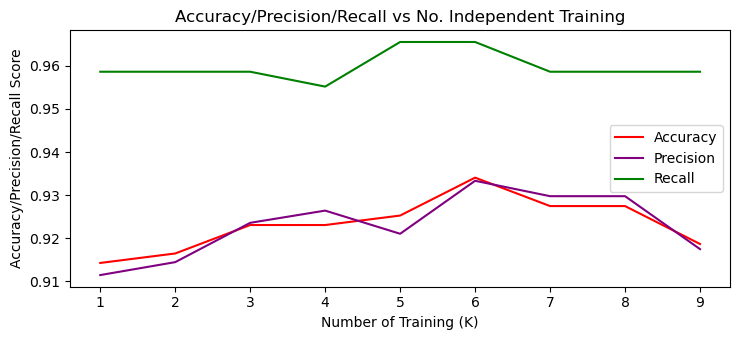

In [33]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Accuracy/Precision/Recall vs No. Independent Training")
plt.xlabel("Number of Training (K)")
plt.ylabel("Accuracy/Precision/Recall Score")
plt.plot(K, acc, label = "Accuracy", color="red")
plt.plot(K, precision, label = "Precision", color="purple")
plt.plot(K, recall, label = "Recall", color="green")

plt.legend()
plt.show()